# Análise de Dados da Plataforma Consumidor.gov.br em 2019

O Consumidor.gov.br, paltaforma criada pelo Governo Federal como alternativa para desafogar o Procon, trouxe ainda uma maior proximidade entre consumidor e empresa para a resolução de conflitos já que não há intermediadores. Serviço público, gratuito e monitorado pelos órgãos de defesa do consumidor, juntamente com a Secretaria Nacional do Consumidor do Ministério da Justiça.

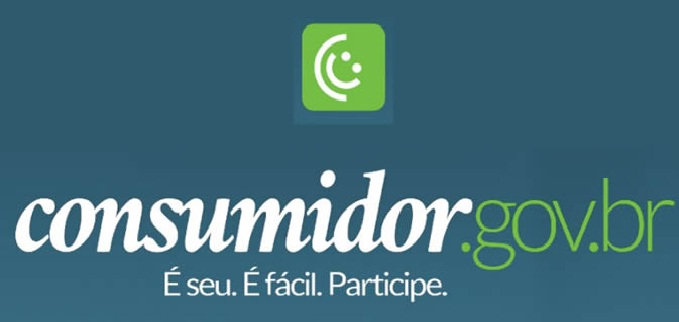

A análise exploratória da plataforma, possibilita a compreensão de como ela está sendo utilizada e se seu propósito vem sendo cumprido.

Os dados foram obtidos no prórpio site Consumidor.gov.br, nos dados abertos onde estão armazenados os dados do ano de 2014 ao ano de 2020.

### Importando Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
%pylab inline

plt.style.use('ggplot')



Populating the interactive namespace from numpy and matplotlib


### Carregando Dataset

Os dados da plataforma referente ao ano de 2019 estão em um único arquivo xlsx.

In [2]:
df = pd.read_excel('C:\Analises_Exploratorias\Analises_Exploratorias\Consumidor.gov.br\Dados_gov.xlsx')

In [3]:
df.columns=['UF', 'Cidade', 'Sexo', 'Faixa Etária', 'Data Finalização', 'Tempo Resposta', 'Nome Fantasia', 'Segmentação de Mercado', 'Área', 'Assunto', 'Grupo Problema', 'Problema', 'Como Comprou Contratou', 'Procurou Empresa', 'Respondida', 'Situação', 'Avaliação Reclamação', 'Nota Consumidor']

### Dicionário de Dados

- UF: Sigla do estado do consumidor reclamante;
- Cidade: Município do consumidor reclamante;
- Sexo: Sigla do sexo do consumidor reclamante;
- Faixa Etária: Faixa etária do consumidor;
- Data Finalização: Data de finalização da reclamação;
- Tempo Resposta: Número de dias para a resposta da reclamação, desconsiderando o tempo que a reclamação tenha ficado em análise pelo gestor;
- Nome Fantasia: Nome pelo qual a empresa reclamada é conhecida pelo mercado;
- Segmentação de mercado: Principal segmento de mercado da empresa participante;
- Área: Área à qual percente o assunto objeot da reclamação;
- Assunto: Assunto objeto da reclamação;
- Grupo Problema: Agrupamento do qual faz parte o problema classificado na reclamação;
- Problema: Descrição do problema objeto da reclamação;
- Como Comprou Contratou: Descrição do meio utilizado para contratação/aquisição do produto ou serviço reclamado;
- Procurou Empresa: Sigla da resposta do consumidor à pergunta: "Procurou a empresa para solucionar o problema?"
- Respondida: Sigla que indica se a empresa respondeu à reclamação ou não;
- Situação: Situação atual da reclamação no sistema;
- Avaliação Reclamação: Classificação atribuída pelo consumidor sobre o desfecho da reclamação;
- Nota do Consumidor: Número da nota de 1 a 5 atribuída pelo consumidor ao atendimento da empresa;


In [4]:
df.head()

,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmentação de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota Consumidor
0,SP,Sorocaba,Masculino,entre 61 a 70 anos,2019-12-05,9.0,Ponto Frio,Varejo,Produtos Eletrodomésticos e Eletrônicos,Televisão,Cobrança / Contestação,Cobrança adicional não informada previamente (...,Loja física,Sim,Sim,Finalizada não avaliada,Não Avaliada,NaN
1,ES,Cachoeiro de Itapemirim,Masculino,entre 21 a 30 anos,2019-12-12,10.0,Vivo - Telefônica (GVT),"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Internet Fixa,Cobrança / Contestação,Cobrança indevida / abusiva para alterar ou ca...,Internet,Sim,Sim,Finalizada não avaliada,Não Avaliada,NaN
2,RS,São Borja,Masculino,entre 51 a 60 anos,2019-12-01,10.0,SKY,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,TV por Assinatura,Contrato / Oferta,Oferta não cumprida / serviço não fornecido/ v...,Não comprei / contratei,Sim,Sim,Finalizada não avaliada,Não Avaliada,NaN
3,BA,Salvador,Masculino,entre 31 a 40 anos,2019-12-01,10.0,SKY,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,TV por Assinatura,Cobrança / Contestação,Cobrança em duplicidade / Cobrança referente a...,Loja física,Não,Sim,Finalizada não avaliada,Não Avaliada,NaN
4,RN,Parnamirim,Masculino,entre 21 a 30 anos,2019-12-01,10.0,SKY,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Internet Fixa,Contrato / Oferta,Publicidade abusiva / ofensiva / discriminatória,Internet,Não,Sim,Finalizada não avaliada,Não Avaliada,NaN


## Análise Exploratória dos Dados


In [5]:
# Quantidade de entradas e variáveis

print("Número de entradas do df:", df.shape[0])
print("Número de variáveis do df:", df.shape[1])

Número de entradas do df: 780168
Número de variáveis do df: 18


Nota-se que o dataset é bem extensos, possuindo centenas de milhares de entradas. Isso mostra que tal ferramenta de resolução dos conflitos, vem sendo bastante requisitada pelos consumidores.


Através do pd.dtypes saberemos quais são os tipos de dados existentes no DataFrame.


In [6]:
# Tipos das variáveis

df.dtypes

UF                                object
Cidade                            object
Sexo                              object
Faixa Etária                      object
Data Finalização          datetime64[ns]
Tempo Resposta                   float64
Nome Fantasia                     object
Segmentação de Mercado            object
Área                              object
Assunto                           object
Grupo Problema                    object
Problema                          object
Como Comprou Contratou            object
Procurou Empresa                  object
Respondida                        object
Situação                          object
Avaliação Reclamação              object
Nota Consumidor                  float64
dtype: object

A grande maioria dos dados estão no formato object.

Em seguida veremos qual é a porcentagem de dados nulos presente no DataFrame. Dependendo da quantidade de valores nulos, será necessário removermos ou preenchermos essas ausências.

In [7]:
# Percentual de valores nulos em cada variável

df.isnull().sum().sort_values(ascending=False) / df.shape[0]

Nota Consumidor           0.439079
Tempo Resposta            0.010799
Avaliação Reclamação      0.000000
Cidade                    0.000000
Sexo                      0.000000
Faixa Etária              0.000000
Data Finalização          0.000000
Nome Fantasia             0.000000
Segmentação de Mercado    0.000000
Área                      0.000000
Assunto                   0.000000
Grupo Problema            0.000000
Problema                  0.000000
Como Comprou Contratou    0.000000
Procurou Empresa          0.000000
Respondida                0.000000
Situação                  0.000000
UF                        0.000000
dtype: float64

Tempo Resposta possui um valor irrisório de 1% de valores nulos. Já a variável Nota Consumidor está com quase 44% de seus dados ausentes. Para realizarmos uma análise mais precisa, faremos uma cópia do DataFrame chamada df_limpo, onde serão removidos todas as entradas com valores nulos.

In [8]:
# Criação de um novo DF para exclusão de valores nulos

df_limpo = df.copy()

In [9]:
# dropar os valores nulos 

df_limpo.dropna(axis=0, inplace=True)

### Descrição do dataset

Visualizaremos agora algumas características estatísticas do DataFrame através da função pd.describe(). Como somente 2 variáveis possuem valores de floats, somente serão plotadas as estatísticas dessas 2 colunas.

In [10]:
df.describe()

,Tempo Resposta,Nota Consumidor
count,771743.000000,437613.000000
mean,6.540071,3.283403
std,3.263324,1.730527
min,0.000000,1.000000
25%,4.000000,1.000000
50%,7.000000,4.000000
75%,9.000000,5.000000
max,15.000000,5.000000


Na variável Tempo Resposta encontramos os seguintes dados estatísticos:

- O tempo médio para as empresas responderem aos consumidores é de 6,5 dias;
- O máximo de tempo para as empresas darem uma resposta foi de 15 dias;

Percebemos que o tempo de resposta, sendo esse considerado apenas ao finalizar a reclamação, no geral, é satisfatório. 

Na variável Nota Consumidor encontramos os seguintes dados estatísticos:

- A média da nota dada pelos consumidores foi de 3,2 pontos;
- Metade das notas foram de 4 pontos;
- Apenas 25% das notas foram de 5 pontos;

As notas dispostas pelos consumidores revelam que a resolução das queixas ainda não atingiu o alto nível de satisfação. 

## Análise Gráfica dos Dados

Realizada a Análise Exploratória, o passo seguinte é analisarmos os gráficos e identificarmos quais insights poderão ser obtidos deles.

O primeiro gráfico a ser plotado será referente aos 6 estados com a maior porcentagem de consumidores que deram entrada na plataforma. Para isso definiremos o DataFrame df_uf com esses valores.

In [11]:
# criação do DataFrame com os 6 estados com a maior porcentagem de consumidores

df_uf = (df['UF'].value_counts() / df.shape[0])[0:6].copy()

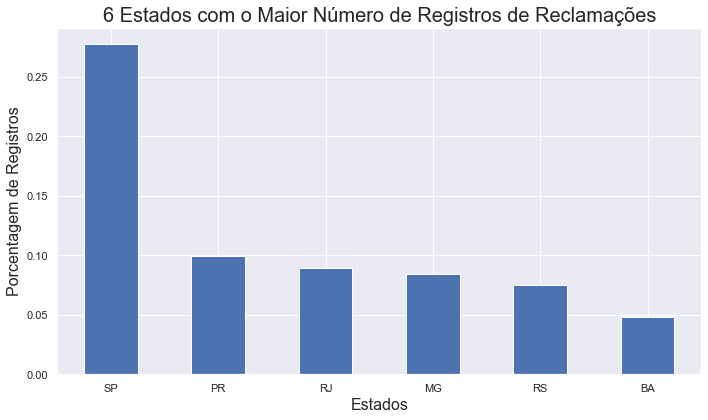

In [12]:
# gráfico de barras para os 6 estados com maior número de registros

sns.set()
fig, ax = plt.subplots(figsize=(10, 6))
df_uf.plot(kind="bar", ax=ax)
ax.set_xlabel("Estados", fontsize=16)
ax.set_ylabel("Porcentagem de Registros", fontsize=16)
ax.set_title("6 Estados com o Maior Número de Registros de Reclamações", fontsize=20)
plt.xticks(rotation=0)
plt.tight_layout()

Identificamos que São Paulo, obteve o maior número de reclamações registradas na plataforma. Podemos considerar o fato de ser o estado mais populoso do país e seus habitantes possuírem um maior poder de compra.

Dos 6 estados com maior número de reclamações, 3 são do Sudestes e 2 são do Sul, sendo o 6º colocado o estado da Bahia, na região Nordeste.


In [13]:
# DataFrame com a quantidade de registros da variável Faixa Etária

df_etaria = df['Faixa Etária'].value_counts().copy()

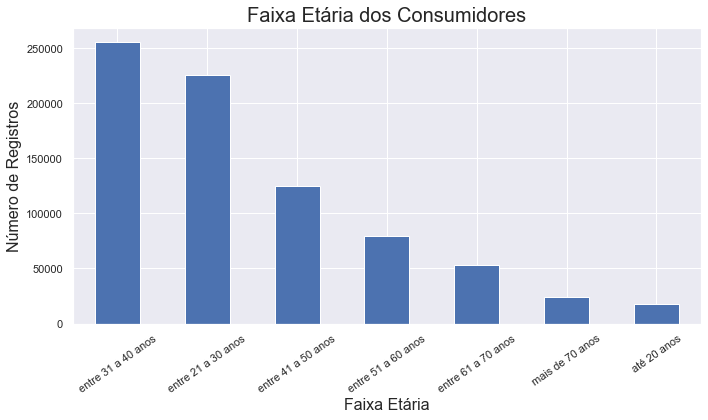

In [14]:
# gráfico de barras da faixa etária dos consumidores

fig, ax = plt.subplots(figsize=(10,6))
df_etaria.plot(kind='bar', ax=ax)
ax.set_title("Faixa Etária dos Consumidores", fontsize=20)
ax.set_xlabel("Faixa Etária", fontsize=16)
ax.set_ylabel("Número de Registros", fontsize=16)
plt.xticks(rotation=35)
plt.tight_layout()

Vemos que a grande maioria dos consumidores possuem entre 21 e 40 anos. O apontamento não poderia ser outro, tendo em vista que a população nessa idade representa os maiores acessos a tecnologia.

In [15]:
# Quantidade de Reclamações por Sexo

df_sexo = df['Sexo'].value_counts().copy()

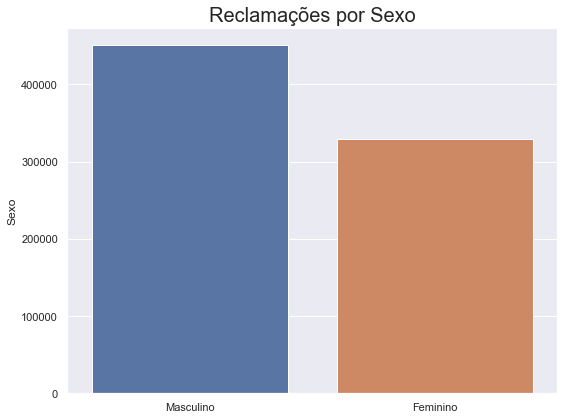

In [16]:
fig, ax = plt.subplots(figsize=(8,6))
sns.set(style='darkgrid')
sexo = df[u'Sexo'].unique()
cont = df[u'Sexo'].value_counts()
ax.set_title("Reclamações por Sexo", fontsize=20)
sns.barplot(x=sexo, y=cont)
plt.tight_layout()

Podemos identificar que a maioria dos consumidores que deram registraram reclamações na plataforma são do sexo masculino.

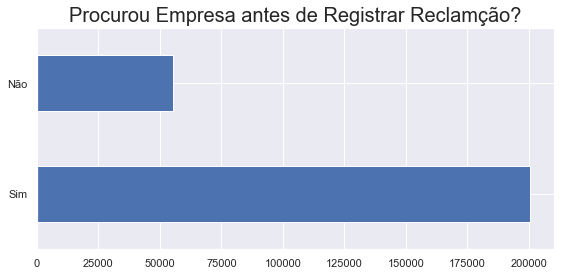

In [17]:
# Procuram a Empresa antes de Registrarem a Reclamação?

fig, ax = plt.subplots(figsize=(8,4))
df2 = df[df[u'Faixa Etária']=='entre 31 a 40 anos']
df2['Procurou Empresa'].value_counts().plot.barh()
ax.set_title("Procurou Empresa antes de Registrar Reclamção?", fontsize=20)
plt.tight_layout()

In [18]:
# Criação do DataFrame com as 10 empresas com o maior número de reclamações

df_empresas = df['Nome Fantasia'].value_counts()[0:10].copy()

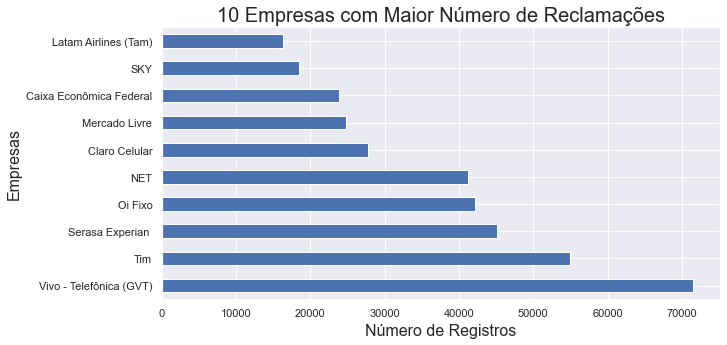

In [19]:
# gráfico de barras das 10 empresas com o maior número de reclamações

fig, ax = plt.subplots(figsize=(10,5))
df_empresas.plot(kind='barh', ax=ax)
ax.set_title('10 Empresas com Maior Número de Reclamações', fontsize=20)
ax.set_xlabel('Número de Registros', fontsize=16)
ax.set_ylabel('Empresas', fontsize=16)
plt.show()

Das 10 empresas com o maior número de reclamações, 5 delas são do segmento de telefonia e/ou internet.

In [20]:
# Grupo de problema mais comum

df['Grupo Problema'].value_counts()

Cobrança / Contestação    336620
Contrato / Oferta         145609
Vício de Qualidade        109553
Atendimento / SAC          92608
Informação                 58817
Entrega do Produto         32941
Saúde e Segurança           4020
Name: Grupo Problema, dtype: int64

c:\users\carleana\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Quantidade de Entradas')

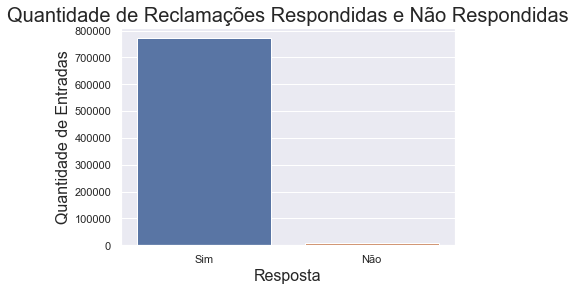

In [21]:
# gráfico de barras para a quantidade de reclamações respondidas
fig, ax = plt.subplots()
sns.countplot(df['Respondida'], ax=ax);
ax.set_title("Quantidade de Reclamações Respondidas e Não Respondidas", fontsize=20)
ax.set_xlabel("Resposta", fontsize=16)
ax.set_ylabel("Quantidade de Entradas", fontsize=16)

Percebe-se que a comunicação entre consumidor e empresa estabelecida pela plataforma é eficaz, com alto índice de respostas para resolução dos conflitos. 

Na Análise Exploratória vimos estatísticas relacionadas ao tempo de resposta, como o tempo médio que as empresas leval para finalizar um registro de reclamação.

Para uma melhor observação dessa variável, podemos utilizar um histograma, permitindo visualizar a relação entre a quantidade de entradas e a quantidade de tempo dispendido para se obter uma resposta.

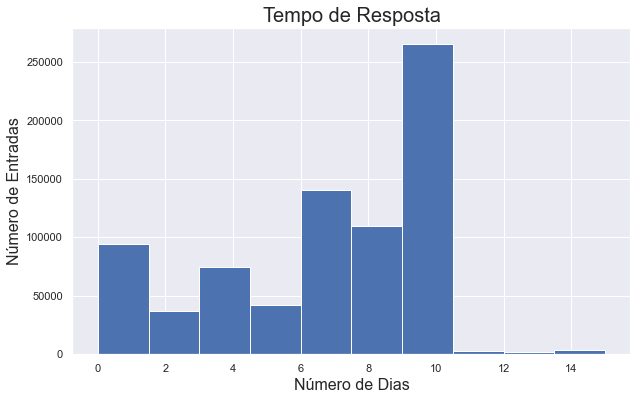

In [22]:
# histograma do tempo de resposta

fig, ax = plt.subplots(figsize=(10,6))
df.hist('Tempo Resposta', ax=ax)
ax.set_title('Tempo de Resposta', fontsize=20)
ax.set_xlabel('Número de Dias', fontsize=16)
ax.set_ylabel('Número de Entradas', fontsize=16)
plt.show()

O histograma revela que as resposta a maior parte das reclamações se dado entre 6 e 10 dias.

Outro histograma importante é o da nota dada pelos consumidores quanto a resolução de seus problemas. 

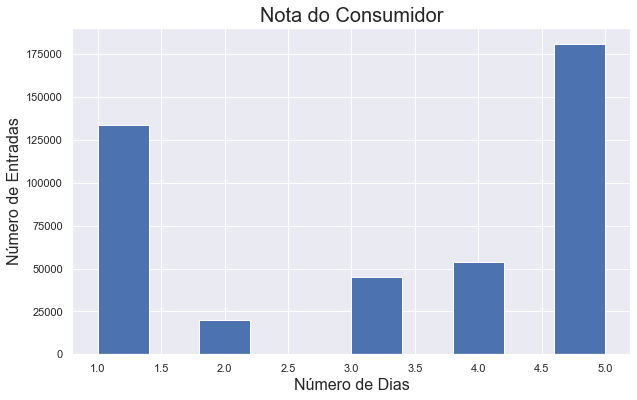

In [23]:
# histograma da variável nota_consumidor

fig, ax = plt.subplots(figsize=(10,6))
df_limpo.hist('Nota Consumidor', ax=ax)
ax.set_title('Nota do Consumidor', fontsize=20)
ax.set_xlabel('Número de Dias', fontsize=16)
ax.set_ylabel('Número de Entradas', fontsize=16)
plt.show()

## Conclusão



Diversos fatores podem ser apontados como responsáveis pelo aumento exponencial do consumo da população brasileira. Os estímulos das empresas e da sociedade ao consumismo desenfreado e incosciente, juntamente com a obsolescência programada dos produtos, podem ser o fator de maior impacto nesse número. E, como em qualquer setor, serviço/produto ofertado, problemas acontecem. 

Independetemente das causas e apesar das diversas contribuições econômicas e sociais desse comportamento, uma das consequências mais prejudiciais à sociedade é o abarrotamento gradativo sofrido pelo judiciário de causas envolvendo as relações de consumo. 
Como vimos ao longo dessa análise, tal ferramenta vem obtendo uma crescente adesão e resolvendo de forma satisfatória os problemas apontados pelos consumidores, com baixo tempo de reposta e taxa de aprovação consideravelmente agradável.

Assim, o espaço onde é promovido o diálogo entre consumidores e empresas de diversos nichos econômicos de forma voluntária e participativa, possibilita o alcance de um desfecho benéfico a ambas as partes. Favorecendo ainda no engajamento dos clientes para que voltem a fazer negócios com as empresas reclamadas. Hoje, a plataforma possui em torno de 861 empresas ativas em seu catálogo.



